In [1]:
import numpy as np
import pandas as pd
import warnings
from pandas.api.types import is_numeric_dtype, is_object_dtype
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("Twitter.csv")
data.head(10)

,Unnamed: 0,Id,Post Contet,Sentiment score,Post Length,Hashtag count,Content URL count,Tweet count,Followers count,Listed Count,Media Type,Published DateTime,Mentions Count,Post author verified,Likes,Shares,Comments,Impact
0,41370,6d967b125fcecba6357dbc43f8f380cf2d6d7a51,Sana all na lang.,0.00,17.0,0.0,0.0,1660.0,133.0,0,TEXT,2021-01-28 12:17:24+00:00,0.0,0.0,0.0,0.0,0.0,0.0
1,27955,22dc5f808a8589186767412f39e5c88ae9753d04,キスマイ玉森裕太「ボス恋」台本の裏話明かす\n\n@TBS_asachan @bosskoi...,19.30,84.0,0.0,1.0,318924.0,1428273.0,5454,TEXT,2021-02-24 06:51:02+00:00,0.0,1.0,10.0,1.0,0.0,110.0
2,38151,7f224e66ad757e3066d45947881bcaab91f8e57f,SuperM’s album isn’t even out yet and there’s ...,0.00,78.0,0.0,0.0,39976.0,1560.0,0,TEXT,2020-09-15 01:16:32+00:00,0.0,0.0,0.0,0.0,0.0,0.0
3,13558,5acc220e7a337efafc4c847b7f74680ca2515890,மத்திய அரசின் நலத்திட்டங்களை மக்களுக்கு சென்று...,0.00,284.0,2.0,0.0,8045.0,27191.0,26,TEXT,2021-02-14 03:53:53+00:00,0.0,1.0,460.0,219.0,4.0,6830.0
4,17071,863abf834897a06afdc459788b34abeae6298f3a,【熊本県人吉市】球磨川氾濫後のくま川鉄道の線路被害状況 hamusoku.com/archi...,-20.00,80.0,0.0,1.0,210996.0,2385.0,0,IMAGE,2020-07-04 13:06:16+00:00,0.0,0.0,0.0,0.0,0.0,0.0
5,5627,d8796b1c018e1069ac51c1cb7e58a4855fc35c57,98DC625B :参戦ID\n参加者募集！\nLv200 ワムデュス\nhttps://t...,14.71,57.0,0.0,0.0,13878.0,1.0,0,IMAGE,2021-01-28 06:36:47+00:00,0.0,0.0,0.0,0.0,0.0,0.0
6,12079,b62242cf44834b6a917df58c84d8a49f68fd7c40,सचिन वझेंना झालेली अटक बेकायदेशीर ! \n#NIA ने ...,-13.73,280.0,1.0,1.0,94130.0,5191.0,23,TEXT,2021-03-14 13:37:00+00:00,0.0,0.0,135.0,40.0,4.0,1790.0
7,25232,907a35b92f04d6b70eb037086b2b5938bb2545aa,Denali's Lip Sync for Your Life on last night'...,17.16,171.0,0.0,1.0,203926.0,507272.0,7365,TEXT,2021-01-23 21:47:21+00:00,0.0,1.0,1753.0,205.0,0.0,19580.0
8,11775,3ea3634cea48131c8289cce7812fbe2311da3e69,【 #西野七瀬の毎日ニット 】\n七瀬が毎日気分のアガるデザインと旬なスタイリングでくるくる...,16.95,143.0,1.0,1.0,54960.0,235166.0,1055,IMAGE,2020-11-10 10:15:02+00:00,0.0,1.0,3.0,0.0,0.0,30.0
9,39910,12951bc6bd108886e931c90ae5f855daf794940c,@TwitchES cáiganle a cotorrear un rato le vam...,0.00,191.0,2.0,1.0,19.0,9.0,0,TEXT,2020-05-15 21:09:16+00:00,1.0,0.0,0.0,0.0,0.0,0.0


In [3]:
data['Sentiment score'].value_counts()

 0.00     29083
 20.00     1724
 1.33       835
 19.99      497
-1.33       438
          ...  
-14.98        1
 15.35        1
 15.34        1
 11.24        1
-0.52         1
Name: Sentiment score, Length: 2100, dtype: int64

In [4]:
# data.rename(columns = {'Unnamed: 0':'Id'}, inplace = True)

In [5]:
data.shape

(50000, 18)

In [6]:
data.dtypes

Unnamed: 0                int64
Id                       object
Post Contet              object
Sentiment score         float64
Post Length             float64
Hashtag count           float64
Content URL count       float64
Tweet count             float64
Followers count         float64
Listed Count              int64
Media Type               object
Published DateTime       object
Mentions Count          float64
Post author verified    float64
Likes                   float64
Shares                  float64
Comments                float64
Impact                  float64
dtype: object

In [7]:
data.date=pd.to_datetime(data['Published DateTime'])
data['month']=data.date.apply(lambda x:x.month)
data['year']=data.date.apply(lambda x:x.year)
data['day']=data.date.apply(lambda x:x.day)

data['hour']=data.date.apply(lambda x:x.hour)

In [8]:
data.drop(columns=['Post Contet','Published DateTime'],axis=1,inplace=True)

In [9]:
def get_cat_num_features(df):
    
    num_features = []
    cat_features = []
    
    for col in df.columns:
        if is_numeric_dtype(df[col]):
            num_features.append(col)
                
        if is_object_dtype(df[col]):
            cat_features.append(col)
            
    return num_features, cat_features

def get_unique_df(features):
    unique_df = pd.DataFrame(columns=['Feature', 'Unique', 'Count'])
    for col in features.columns:
        v = features[col].unique()
        l = len(v)
        unique_df = unique_df.append({'Feature':col, 
                                     'Unique':v,
                                     'Count':l}, ignore_index=True)
    return unique_df

def get_null_df(features):
    col_null_df = pd.DataFrame(columns = ['Column', 'Type', 'Total NaN', '%'])
    col_null = features.columns[features.isna().any()].to_list()
    L = len(features)
    for col in col_null:
        T = 0
        if is_numeric_dtype(features[col]):
            T = "Numerical"  
        else:
            T = "Categorical"
        nulls = len(features[features[col].isna() == True][col])   
        col_null_df = col_null_df.append({'Column': col, 
                                          'Type': T,
                                          'Total NaN': nulls,
                                          '%': (nulls / L)*100
                                         }, ignore_index=True)
        
    return col_null_df

def summary(data):
    
    print("Samples --> ", len(data))
    print()
    target = data['Impact']
    features = data.drop(['Impact'], axis=1)
    print("Features --> ", len(features.columns))
    print("\n",features.columns)
    
    num_features, cat_features = get_cat_num_features(features)
      
    print()
    print("\nNumerical Features --> ", len(num_features))
    print()
    print(num_features)
    print()
    print("Categorical Features -->", len(cat_features))
    print()
    print(cat_features)
    print()
    print("*************************************************")
    stats = features.describe().T
    
    print()
    print("Value counts of each categorical feature\n")
    for col in cat_features:
        print(col)
        print(features[col].value_counts())
        print()
        
    unique_df = get_unique_df(features)
    
    col_null_df = get_null_df(features)
    
    return {'features':features, 
            'target': target, 
            'stats': stats, 
            'unique_df':unique_df,
            'col_null_df': col_null_df}


In [10]:
data_summary=summary(data)

Samples -->  50000

Features -->  19

 Index(['Unnamed: 0', 'Id', 'Sentiment score', 'Post Length', 'Hashtag count',
       'Content URL count', 'Tweet count', 'Followers count', 'Listed Count',
       'Media Type', 'Mentions Count', 'Post author verified', 'Likes',
       'Shares', 'Comments', 'month', 'year', 'day', 'hour'],
      dtype='object')


Numerical Features -->  17

['Unnamed: 0', 'Sentiment score', 'Post Length', 'Hashtag count', 'Content URL count', 'Tweet count', 'Followers count', 'Listed Count', 'Mentions Count', 'Post author verified', 'Likes', 'Shares', 'Comments', 'month', 'year', 'day', 'hour']

Categorical Features --> 2

['Id', 'Media Type']

*************************************************

Value counts of each categorical feature

Id
6187ee9b5c10fdb306a57622ea4befc2849b9a1c    4
714f2a7090c238f9ccfadac987959a0cfea28c45    4
8042bdf87ed0c8d326b83e058a1f401c60496043    4
333b5ba98ddd6e297e922a952e5cb9cdeb54ee04    4
2dd5111d5f5e27dfb55cba5849b278c99ce543e6    4


In [11]:
# Features with only 1 unique value
data_summary['unique_df'][data_summary['unique_df']['Count'] == 1]

,Feature,Unique,Count


In [12]:
data_summary['col_null_df']

,Column,Type,Total NaN,%


In [13]:
data_summary['stats']

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,50000.0,1.419358e+04,1.036350e+04,0.0,6017.00,12076.5,20650.25,43879.0
Sentiment score,50000.0,1.068916e+00,1.043675e+01,-20.0,0.00,0.0,0.00,20.0
Post Length,50000.0,1.546924e+02,7.909941e+01,1.0,94.00,142.0,215.00,373.0
Hashtag count,50000.0,6.875200e-01,1.346979e+00,0.0,0.00,0.0,1.00,21.0
Content URL count,50000.0,4.802600e-01,5.260189e-01,0.0,0.00,0.0,1.00,7.0
Tweet count,50000.0,2.414257e+05,1.607467e+06,0.0,11237.75,52738.0,259501.50,50444081.0
Followers count,50000.0,4.648759e+06,1.254513e+07,0.0,10539.00,355122.5,2809978.25,114440557.0
Listed Count,50000.0,1.006968e+04,2.838496e+04,0.0,2.00,555.5,6171.00,568139.0
Mentions Count,50000.0,1.137200e-01,5.129844e-01,0.0,0.00,0.0,0.00,12.0
Post author verified,50000.0,6.264800e-01,4.837432e-01,0.0,0.00,1.0,1.00,1.0


In [14]:
target = data_summary['target']
target

0           0.0
1         110.0
2           0.0
3        6830.0
4           0.0
          ...  
49995       0.0
49996       0.0
49997       0.0
49998      30.0
49999       0.0
Name: Impact, Length: 50000, dtype: float64

In [15]:
df = data_summary['features']

cleaned_df = df


#

In [16]:
cleaned_df.drop(['Id'], axis=1, inplace=True)
print(cleaned_df.shape)

(50000, 18)


In [17]:
data_summary['unique_df'][data_summary['unique_df']['Count']==1]

,Feature,Unique,Count


In [18]:
col_null_df = data_summary["col_null_df"]

In [19]:
data['Media Type'].value_counts()

TEXT     30176
IMAGE    17426
VIDEO     2398
Name: Media Type, dtype: int64

In [20]:
def imputation(null_df, df):
    
    for ind, row in null_df.iterrows():
        col = row['Column']
        if row['Type'] == 'Categorical':
            df[col].fillna('NotAvail', inplace=True)
        else:
            df[col].fillna(df[col].median(), inplace=True)
    
    return df

# null_df = col_null_df[col_null_df['%'] < 80]
null_df = col_null_df

cleaned_df = imputation(null_df, cleaned_df)


print(cleaned_df.shape)

(50000, 18)


In [21]:
cleaned_df.columns[cleaned_df.isna().any()]

Index([], dtype='object')

In [22]:
cleaned_df.columns

Index(['Unnamed: 0', 'Sentiment score', 'Post Length', 'Hashtag count',
       'Content URL count', 'Tweet count', 'Followers count', 'Listed Count',
       'Media Type', 'Mentions Count', 'Post author verified', 'Likes',
       'Shares', 'Comments', 'month', 'year', 'day', 'hour'],
      dtype='object')

In [23]:
def calc_interquartile(df, column):
    
    #calculating the first and third quartile
    first_quartile, third_quartile = np.percentile(df[column], 25), np.percentile(df[column], 75)
    
    #calculate the interquartilerange
    iqr = third_quartile - first_quartile
    
    # outlier cutoff (1.5 is a generally taken as a threshold thats why i am also taking it)
    cutoff = iqr*1.5
    
    #calculate the lower and upper limits
    lower, upper = first_quartile - cutoff , third_quartile + cutoff
    
    #remove the outliers from the columns
    upper_outliers = df[df[column] > upper]
    lower_outliers = df[df[column] < lower]
    
    return lower, upper, lower_outliers.shape[0]+upper_outliers.shape[0]


def get_outliers(df, num_feat):
    
    outlier_df = pd.DataFrame(columns=['Feature', 'Total Outliers','Upper limit', 'Lower limit'])
    
    for col in num_feat:
        lower, upper, total = calc_interquartile(df, col)
        if total != 0 and (upper !=0 and lower!=0):
            outlier_df = outlier_df.append({'Feature':col, 'Total Outliers': total,
                                       'Upper limit': upper, 'Lower limit':lower}, ignore_index=True)
        
    return outlier_df

num_feat, _ = get_cat_num_features(cleaned_df)

outlier_df = get_outliers(cleaned_df, num_feat)
outlier_df

,Feature,Total Outliers,Upper limit,Lower limit
0,Unnamed: 0,413,42600.125,-15932.875
1,Hashtag count,4236,2.500,-1.500
2,Content URL count,59,2.500,-1.500
3,Tweet count,3099,631897.125,-361157.875
4,Followers count,6932,7009137.125,-4188619.875
5,Listed Count,6896,15424.500,-9251.500
6,Likes,7788,4771.000,-2861.000
7,Shares,7321,1397.500,-838.500


In [24]:
def remove_outliers(df, outlier_df, num_feat):
    
    for col in outlier_df['Feature'].to_list():
        upper = outlier_df[outlier_df['Feature']== col ]['Upper limit'].values[0]
        lower = outlier_df[outlier_df['Feature']== col ]['Lower limit'].values[0]
        
        df[col] = np.where(df[col]>upper, upper, df[col])
        df[col] = np.where(df[col]<lower, lower, df[col])
        
    return df

cleaned_df = remove_outliers(cleaned_df, outlier_df, num_feat)

In [25]:
get_outliers(cleaned_df, num_feat)

,Feature,Total Outliers,Upper limit,Lower limit


In [26]:
print(cleaned_df.shape)

(50000, 18)


In [27]:
unique_df = get_unique_df(cleaned_df)
unique_df

,Feature,Unique,Count
0,Unnamed: 0,"[41370.0, 27955.0, 38151.0, 13558.0, 17071.0, ...",27579
1,Sentiment score,"[0.0, 19.3, -20.0, 14.71, -13.73, 17.16, 16.95...",2100
2,Post Length,"[17.0, 84.0, 78.0, 284.0, 80.0, 57.0, 280.0, 1...",329
3,Hashtag count,"[0.0, 2.0, 1.0, 2.5]",4
4,Content URL count,"[0.0, 1.0, 2.0, 2.5]",4
5,Tweet count,"[1660.0, 318924.0, 39976.0, 8045.0, 210996.0, ...",36323
6,Followers count,"[133.0, 1428273.0, 1560.0, 27191.0, 2385.0, 1....",32673
7,Listed Count,"[0.0, 5454.0, 26.0, 23.0, 7365.0, 1055.0, 856....",8252
8,Media Type,"[TEXT, IMAGE, VIDEO]",3
9,Mentions Count,"[0.0, 1.0, 4.0, 2.0, 3.0, 8.0, 9.0, 6.0, 10.0,...",13


In [28]:
unique_df[unique_df['Count']==1]

,Feature,Unique,Count


In [29]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [30]:
trans_df = cleaned_df.copy()
num_feat, _ = get_cat_num_features(cleaned_df)

def transformed_feat(trans_df, num_feat):
    
    for col in num_feat:
        t = scaler.fit_transform(np.array(cleaned_df[col]).reshape(-1,1))
        trans_df[col] = t.reshape(-1)
        
        
    return trans_df

trans_df = transformed_feat(trans_df, num_feat)

In [31]:
print(trans_df.shape)

(50000, 18)


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [33]:
num_feat, cat_feat = get_cat_num_features(trans_df)

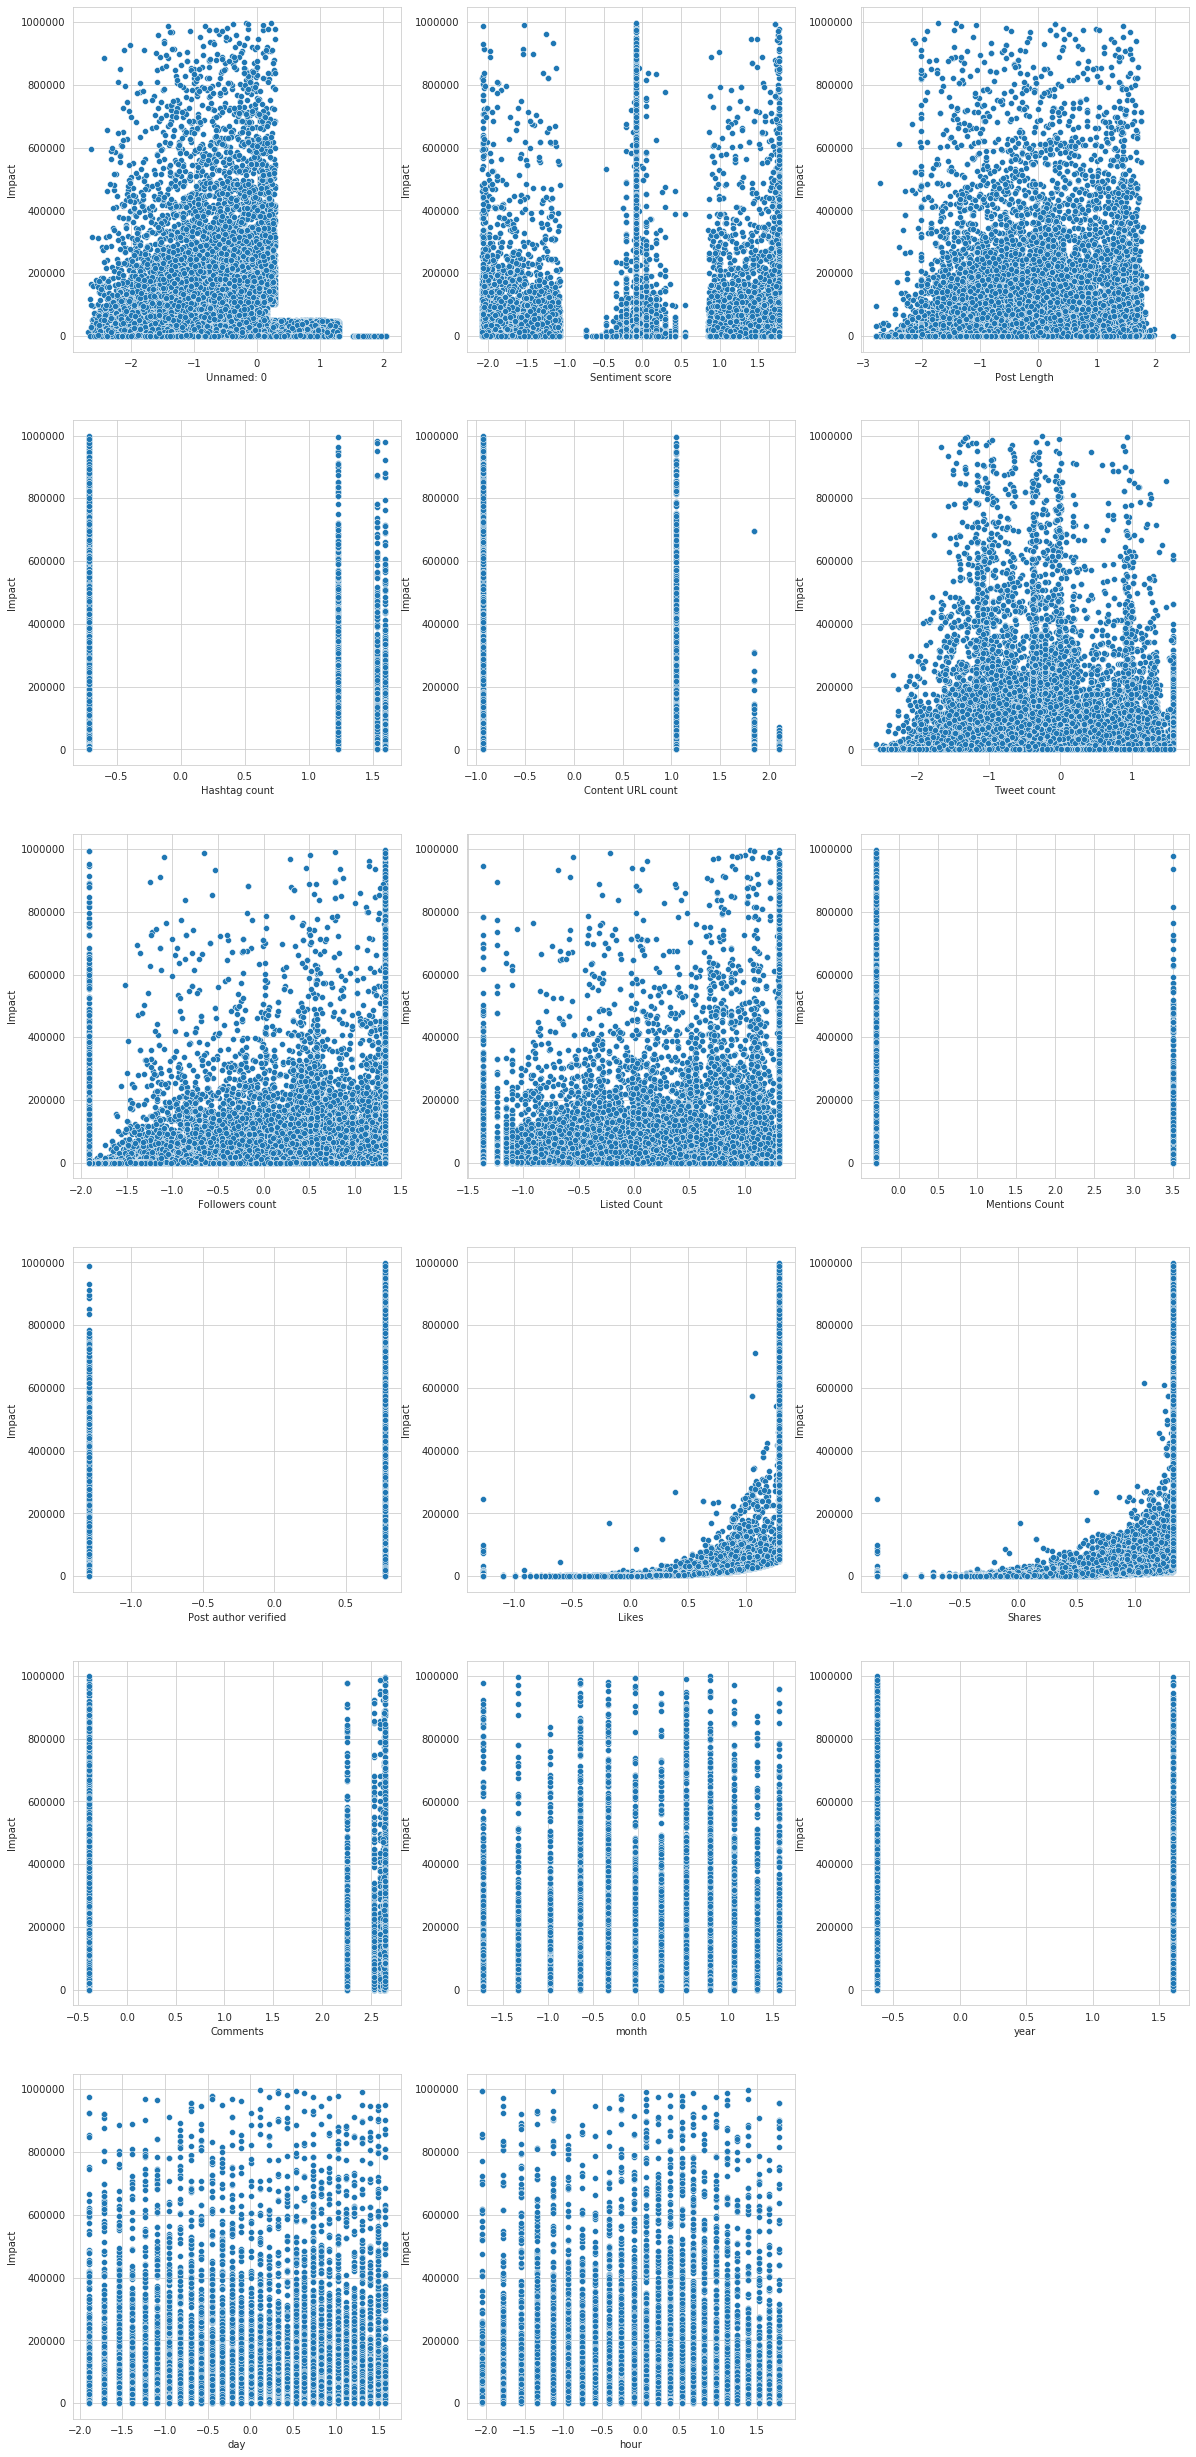

In [34]:
plt.figure(figsize=(20,90))
for i in range(len(num_feat)):
    plt.subplot(12, 3, i+1)
    sns.scatterplot(x=trans_df[num_feat[i]], y=target)

plt.show()

In [35]:
# #  Bar Plot for Categorical Features
# for col in cat_feat:
#     plt.figure(figsize=(30, 10))
#     sns.barplot(x=trans_df[col], y=target)
#     plt.show()

In [36]:
# # Box Plot of Numerical Features

# plt.figure(figsize=(20,90))
# for i in range(len(num_feat)):
#     plt.subplot(12, 3, i+1)
#     sns.boxplot(y=trans_df[num_feat[i]])

# plt.show()

In [37]:
# # Distribution Plots
# for i in num_feat:
#     sns.displot(x=trans_df[i], kde=True)
#     plt.show()

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
ordinal_feat=['Sentiment score', 'Post Length',
       'Hashtag count', 'Content URL count', 'Tweet count', 'Followers count',
       'Listed Count', 'Media Type', 'Published DateTime', 'Mentions Count',
       'Post author verified', 'Likes', 'Shares', 'Comments']
nominal_feat=[ 'Media Type']

In [40]:
enc_df = trans_df.copy()

def encode_feat(nom_feat, ord_feat,  df, t_df=pd.DataFrame()):
    
    
    # dummy encoding nominal features
    for col in nom_feat:
        dum = pd.get_dummies(df[col], prefix=col)
        df = pd.concat([df, dum], axis=1)
        df.drop([col], axis=1, inplace=True)
        
        if len(t_df) != 0:
            t_df = pd.concat([t_df, dum], axis=1)
            t_df.drop([col], axis=1, inplace=True)
     
    if len(t_df) != 0:
        return df, t_df
    else:
        return df


enc_df = encode_feat(nominal_feat, ordinal_feat, enc_df) 

In [41]:
print(enc_df.shape)

(50000, 20)


In [42]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA, KernelPCA
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_error, make_scorer
from sklearn.pipeline import Pipeline

In [43]:
sc = ('Scaler', StandardScaler())
est =[]
est.append(('LinearRegression', Pipeline([sc, ('LinearRegression', LinearRegression())])))
est.append(('DecisionTree', Pipeline([sc,('DecisionTree', DecisionTreeRegressor())])))

In [44]:
enc_df.columns

Index(['Unnamed: 0', 'Sentiment score', 'Post Length', 'Hashtag count',
       'Content URL count', 'Tweet count', 'Followers count', 'Listed Count',
       'Mentions Count', 'Post author verified', 'Likes', 'Shares', 'Comments',
       'month', 'year', 'day', 'hour', 'Media Type_IMAGE', 'Media Type_TEXT',
       'Media Type_VIDEO'],
      dtype='object')

In [45]:
enc_df.dtypes

Unnamed: 0              float64
Sentiment score         float64
Post Length             float64
Hashtag count           float64
Content URL count       float64
Tweet count             float64
Followers count         float64
Listed Count            float64
Mentions Count          float64
Post author verified    float64
Likes                   float64
Shares                  float64
Comments                float64
month                   float64
year                    float64
day                     float64
hour                    float64
Media Type_IMAGE          uint8
Media Type_TEXT           uint8
Media Type_VIDEO          uint8
dtype: object

In [46]:
import warnings
warnings.filterwarnings(action='ignore')
seed = 3000
splits = 4
models_score ={}
for i in est:
    kfold = KFold(n_splits=splits, random_state=seed, shuffle=True)
    results = cross_val_score(i[1], enc_df, target, cv=kfold)
    models_score.update({i[0] : results.mean()})
    
sorted(models_score.items(), key= lambda v:v[1], reverse=True)

[('DecisionTree', 0.4943744945643071),
 ('LinearRegression', 0.27206546223492656)]

K-best Feature Extraction

In [47]:
base_model_scores = sorted(models_score.items(), key= lambda v:v[1], reverse=True)

In [48]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression,  f_classif

In [49]:
num_feat, cat_feat = get_cat_num_features(trans_df)
num_df = trans_df[num_feat]
cat_df = trans_df[cat_feat]

print("Total Numerical Features = ", len(num_feat))
print("Total Categorical Features = ", len(cat_feat))

Total Numerical Features =  17
Total Categorical Features =  1


In [50]:
# define feature selection
num_fs = SelectKBest(score_func=f_regression, k=10)
# apply feature selection
num_fs.fit(num_df, target)
# get the column indices
cols  = num_fs.get_support(indices=True)
best_num_df = num_df.iloc[:,cols]

best_num_df

,Unnamed: 0,Sentiment score,Content URL count,Tweet count,Followers count,Listed Count,Post author verified,Likes,Shares,Comments
0,1.975917,-0.082484,-0.937036,-1.408302,-1.514838,-1.364750,-1.295080,-1.270760,-1.207718,-0.391047
1,1.237088,1.709621,1.043447,1.058263,0.607651,0.903468,0.772153,-0.647752,-0.969243,-0.391047
2,1.812685,-0.082484,-0.937036,-0.194594,-1.185597,-1.364750,-1.295080,-1.270760,-1.207718,-0.391047
3,0.164977,-0.082484,-0.937036,-0.891153,-0.631274,-0.684271,0.772153,0.473478,0.666633,2.620510
4,0.470327,-2.076353,1.043447,0.771018,-1.116484,-1.364750,-1.295080,-1.270760,-1.207718,-0.391047
...,...,...,...,...,...,...,...,...,...,...
49995,0.427106,-0.082484,1.043447,0.002835,-0.428930,-1.364750,-1.295080,-1.270760,-1.207718,-0.391047
49996,0.118220,-0.082484,1.043447,0.099100,-0.555873,-1.364750,-1.295080,-1.270760,-1.207718,-0.391047
49997,1.847127,-0.082484,1.043447,-1.421020,-1.637846,-1.364750,-1.295080,-1.270760,-1.207718,-0.391047
49998,-0.929659,-1.088369,-0.937036,1.531441,0.174744,0.427847,0.772153,-0.919133,-1.207718,-0.391047


In [51]:
import warnings
warnings.filterwarnings(action='ignore')

def lab_encode_feat(df):
    
    # Label encoding ordinal features
    le = LabelEncoder()
    
    for col in df.columns:
        df[col] = le.fit_transform(df[col])
        
    return df

lab_encode_feat(cat_df) 
cat_df

,Media Type
0,1
1,1
2,1
3,1
4,0
...,...
49995,1
49996,1
49997,1
49998,0


In [52]:
cat_fs = SelectKBest(score_func=f_classif, k=1)
cat_fs.fit(cat_df, target)
cols = cat_fs.get_support(indices=True)
best_cat_df = cat_df.iloc[:, cols]

best_cat_df

,Media Type
0,1
1,1
2,1
3,1
4,0
...,...
49995,1
49996,1
49997,1
49998,0


In [53]:
best_cols = best_num_df.columns.to_list() + best_cat_df.columns.to_list()
best_cols

['Unnamed: 0',
 'Sentiment score',
 'Content URL count',
 'Tweet count',
 'Followers count',
 'Listed Count',
 'Post author verified',
 'Likes',
 'Shares',
 'Comments',
 'Media Type']

In [54]:
best_feat_df = trans_df[best_cols]
best_feat_df

,Unnamed: 0,Sentiment score,Content URL count,Tweet count,Followers count,Listed Count,Post author verified,Likes,Shares,Comments,Media Type
0,1.975917,-0.082484,-0.937036,-1.408302,-1.514838,-1.364750,-1.295080,-1.270760,-1.207718,-0.391047,TEXT
1,1.237088,1.709621,1.043447,1.058263,0.607651,0.903468,0.772153,-0.647752,-0.969243,-0.391047,TEXT
2,1.812685,-0.082484,-0.937036,-0.194594,-1.185597,-1.364750,-1.295080,-1.270760,-1.207718,-0.391047,TEXT
3,0.164977,-0.082484,-0.937036,-0.891153,-0.631274,-0.684271,0.772153,0.473478,0.666633,2.620510,TEXT
4,0.470327,-2.076353,1.043447,0.771018,-1.116484,-1.364750,-1.295080,-1.270760,-1.207718,-0.391047,IMAGE
...,...,...,...,...,...,...,...,...,...,...,...
49995,0.427106,-0.082484,1.043447,0.002835,-0.428930,-1.364750,-1.295080,-1.270760,-1.207718,-0.391047,TEXT
49996,0.118220,-0.082484,1.043447,0.099100,-0.555873,-1.364750,-1.295080,-1.270760,-1.207718,-0.391047,TEXT
49997,1.847127,-0.082484,1.043447,-1.421020,-1.637846,-1.364750,-1.295080,-1.270760,-1.207718,-0.391047,TEXT
49998,-0.929659,-1.088369,-0.937036,1.531441,0.174744,0.427847,0.772153,-0.919133,-1.207718,-0.391047,IMAGE


In [55]:
best_cat_df.columns.to_list()

['Media Type']

In [56]:
# strong nominal and ordinal columns
nom_cols = []
ord_cols = []
for col in best_cat_df.columns.to_list():
    if col in nominal_feat:
        nom_cols.append(col)
    else:
        ord_cols.append(col)

In [57]:
nom_cols

['Media Type']

In [58]:
ord_cols

[]

In [59]:
best_feat_df = encode_feat(nom_cols, ord_cols, best_feat_df)
best_feat_df

,Unnamed: 0,Sentiment score,Content URL count,Tweet count,Followers count,Listed Count,Post author verified,Likes,Shares,Comments,Media Type_IMAGE,Media Type_TEXT,Media Type_VIDEO
0,1.975917,-0.082484,-0.937036,-1.408302,-1.514838,-1.364750,-1.295080,-1.270760,-1.207718,-0.391047,0,1,0
1,1.237088,1.709621,1.043447,1.058263,0.607651,0.903468,0.772153,-0.647752,-0.969243,-0.391047,0,1,0
2,1.812685,-0.082484,-0.937036,-0.194594,-1.185597,-1.364750,-1.295080,-1.270760,-1.207718,-0.391047,0,1,0
3,0.164977,-0.082484,-0.937036,-0.891153,-0.631274,-0.684271,0.772153,0.473478,0.666633,2.620510,0,1,0
4,0.470327,-2.076353,1.043447,0.771018,-1.116484,-1.364750,-1.295080,-1.270760,-1.207718,-0.391047,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.427106,-0.082484,1.043447,0.002835,-0.428930,-1.364750,-1.295080,-1.270760,-1.207718,-0.391047,0,1,0
49996,0.118220,-0.082484,1.043447,0.099100,-0.555873,-1.364750,-1.295080,-1.270760,-1.207718,-0.391047,0,1,0
49997,1.847127,-0.082484,1.043447,-1.421020,-1.637846,-1.364750,-1.295080,-1.270760,-1.207718,-0.391047,0,1,0
49998,-0.929659,-1.088369,-0.937036,1.531441,0.174744,0.427847,0.772153,-0.919133,-1.207718,-0.391047,1,0,0


In [60]:
import warnings
warnings.filterwarnings(action='ignore')
seed = 4
splits = 7
models_score ={}
for i in est:
    kfold = KFold(n_splits=splits, random_state=seed, shuffle=True)
    results = cross_val_score(i[1], best_feat_df, target, cv=kfold)
    models_score.update({i[0] : results.mean()})
    
sorted(models_score.items(), key= lambda v:v[1], reverse=True)

[('DecisionTree', 0.4714355472247918), ('LinearRegression', 0.264652404918661)]

Feature Scaling and reduction

In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaled_df = StandardScaler().fit_transform(enc_df)
pca = PCA(n_components=0.99, svd_solver='full')
pca_enc_df = pca.fit_transform(scaled_df)

pca_enc_df.shape

(50000, 18)

In [62]:
import warnings
warnings.filterwarnings(action='ignore')
seed = 4
splits = 4
models_score ={}
for i in est:
    kfold = KFold(n_splits=splits, random_state=seed, shuffle=True)
    results = cross_val_score(i[1], pca_enc_df, target, cv=kfold)
    models_score.update({i[0] : results.mean()})
    
sorted(models_score.items(), key= lambda v:v[1], reverse=True)

[('LinearRegression', 0.26646341413360075),
 ('DecisionTree', -0.015675567428773823)]

Implementation of neural network